## ANALYSE EXPLORATOIRE DU JEUX DE DONNEES

**Meta données**

AGE : âge du patient,

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie Ã  jeun [1 : si glycémie Ã  jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'electrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Chargement du Dataset
df = pd.read_excel('../dataset/Heart.xlsx')

In [3]:
#Affichage des 5 première ligne du Dataset.
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
#Faire la copie du Dataset
data = df.copy()

In [5]:
#Affichage de la taille du Dataset
data.shape

(918, 12)

In [6]:
#Vérification des doublons
data.duplicated().sum()

0

In [7]:
#Changement du nom des variables
data.rename(columns={
    'TDT':'Type_Douleur_Thoracique',
    'PAR':'Pression_Arterielle_Repos',
    'GAJ':'Glycemie_Jeûne',
    'EGC':'Electrocardiogram_Repos',
    'FCMAX':'Frequence_Cardiaque_Max',
    'DEPRESSION ':'Depression',
    'CŒUR':'coeur'
},inplace=True)

In [8]:
data.head()

,AGE,SEXE,Type_Douleur_Thoracique,Pression_Arterielle_Repos,CHOLESTEROL,Glycemie_Jeûne,ECG,Frequence_Cardiaque_Max,ANGINE,Depression,PENTE,coeur
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [9]:
data.dtypes

AGE                            int64
SEXE                          object
Type_Douleur_Thoracique       object
Pression_Arterielle_Repos      int64
CHOLESTEROL                    int64
Glycemie_Jeûne                 int64
ECG                           object
Frequence_Cardiaque_Max        int64
ANGINE                        object
Depression                   float64
PENTE                         object
coeur                          int64
dtype: object

In [10]:
data['coeur'] = data['coeur'].replace({0:"Absence",1:"Présence"}).astype('object')
data['Glycemie_Jeûne'] = data['Glycemie_Jeûne'].replace({0:'GAJ<120 mg/dl',1:'GAJ>120 mg/dl'}).astype('object')
df_quali = []
df_quanti = []
for col in data.columns:
    if data[col].dtype == 'object':
        df_quali.append(col)
    elif data[col].dtype in ['int64','float64']:
        df_quanti.append(col)

### Analyse Univariée

* Variable Qualitative

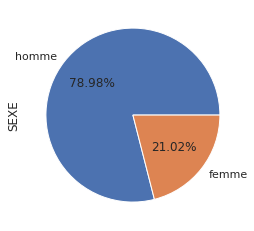

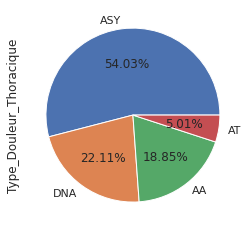

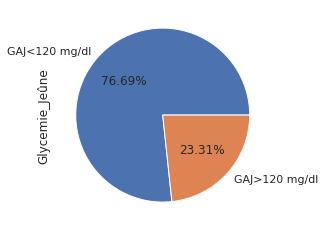

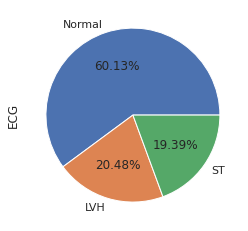

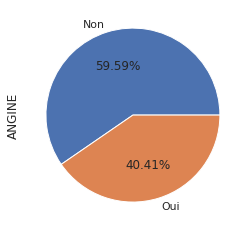

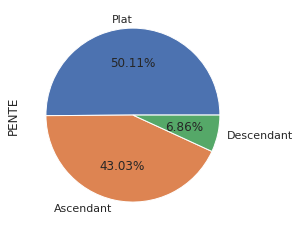

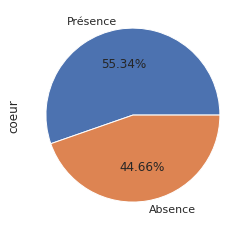

In [13]:
#Représentation graphique des variables qualitatives
for val in df_quali:
    plt.figure()
    data[val].value_counts().plot.pie(autopct="%1.2f%%")

* Variable Quantitative

In [14]:
#Visualisation des statistiques basique des variables quantitative
data[df_quanti].describe()

,AGE,Pression_Arterielle_Repos,CHOLESTEROL,Frequence_Cardiaque_Max,Depression
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


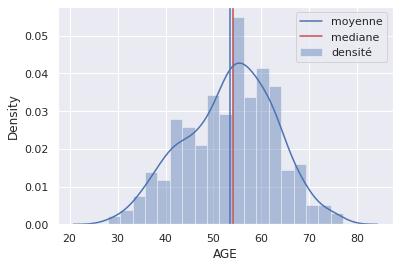

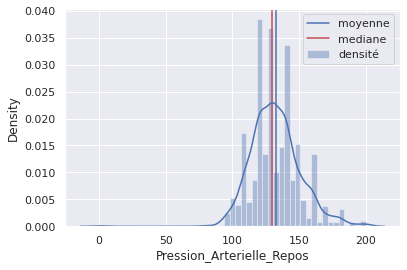

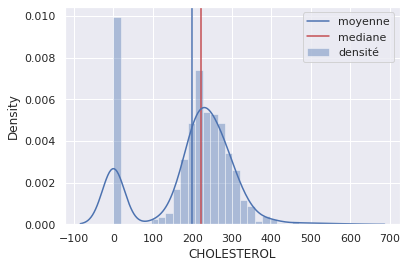

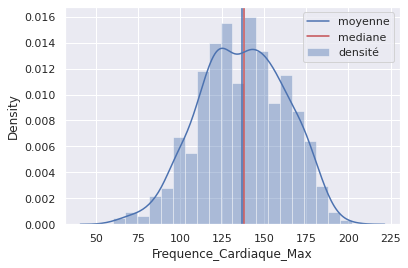

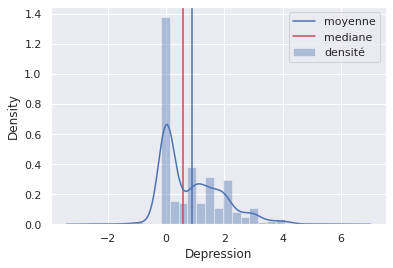

In [15]:
#Visualisation de la distribution des variables quantitative
for val in df_quanti:
    plt.figure()
    plt.axvline(data[val].mean(), c='b', label='moyenne')
    plt.axvline(data[val].median(), c='r', label="mediane")
    sns.distplot(data[val], label='densité')
    plt.legend()

### Analyse Bivariée

* Variable cible (Target)/Variable Qualitatives

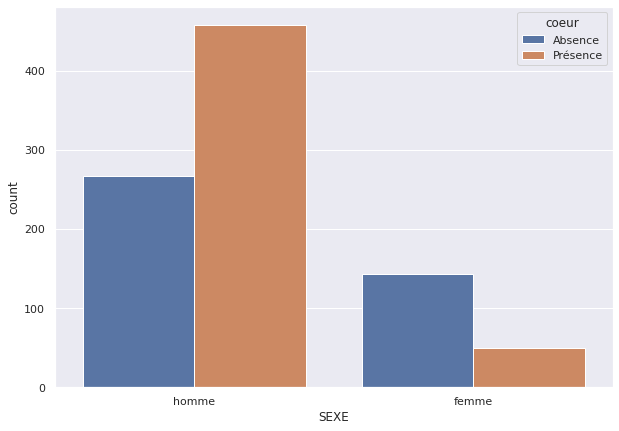

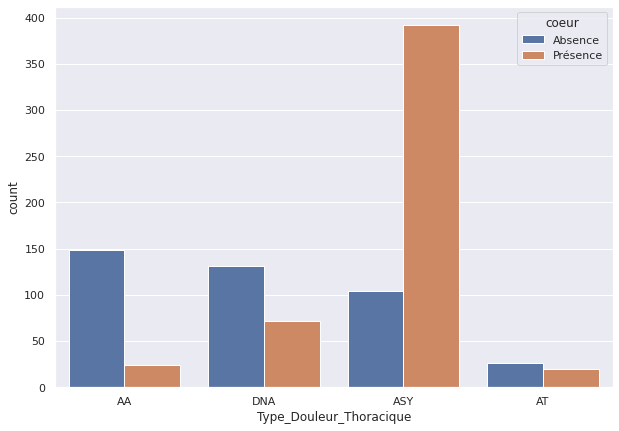

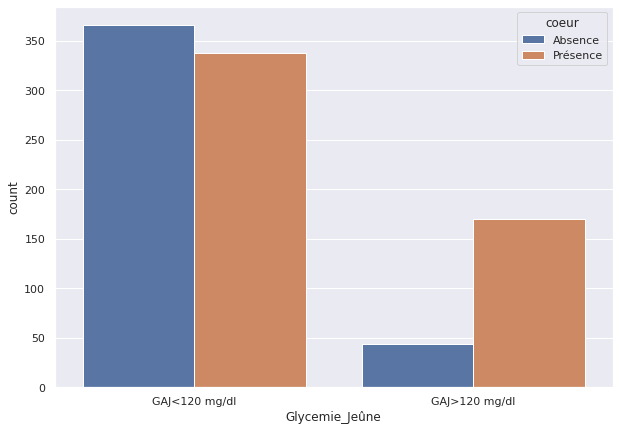

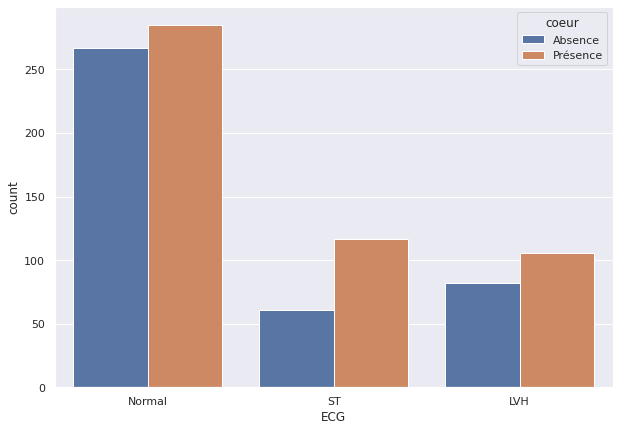

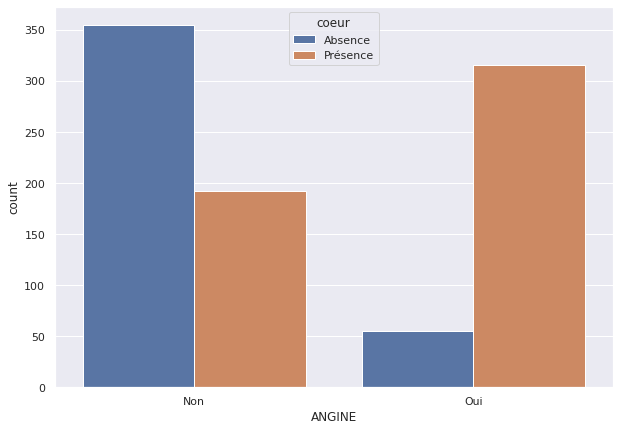

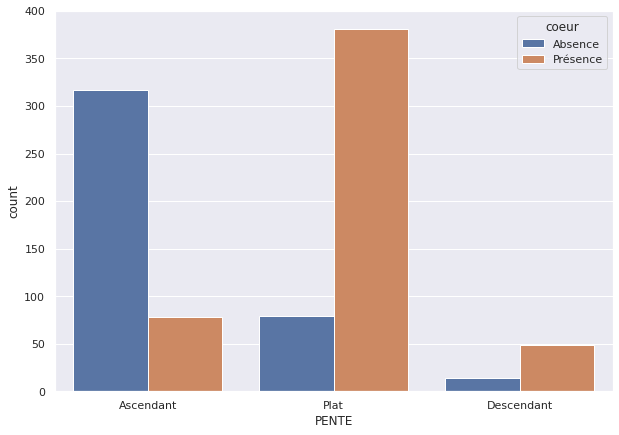

In [16]:
#Visualisation de la repartion des modalités des variables qualitative en fonction de la variable cible
for col in df_quali:
    if col != 'coeur':
        plt.figure(figsize=(10, 7))
        sns.countplot(x=col, hue='coeur', data=data);

* Variables Cible(Target) / Variables Quantitatives

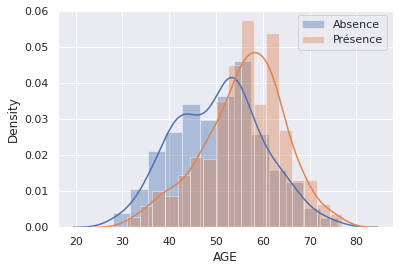

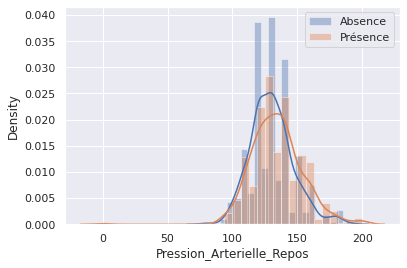

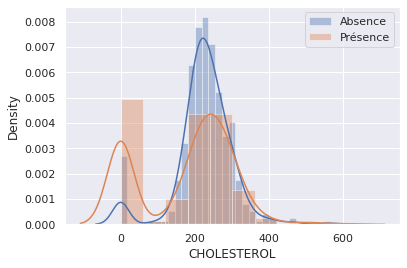

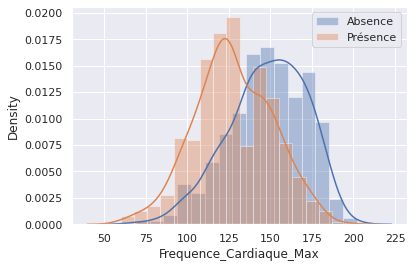

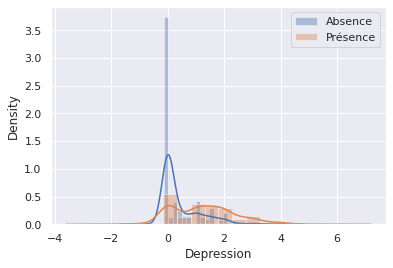

In [18]:
#Visualisation de la distrubition des variable quantitative en fonction de la variable cible.
for col in df_quanti:
    plt.figure()
    sns.distplot(data.loc[(data['coeur']=="Absence"),data.columns][col], label="Absence")
    sns.distplot(data.loc[(data['coeur']=="Présence"),data.columns][col], label="Présence")
    plt.legend()

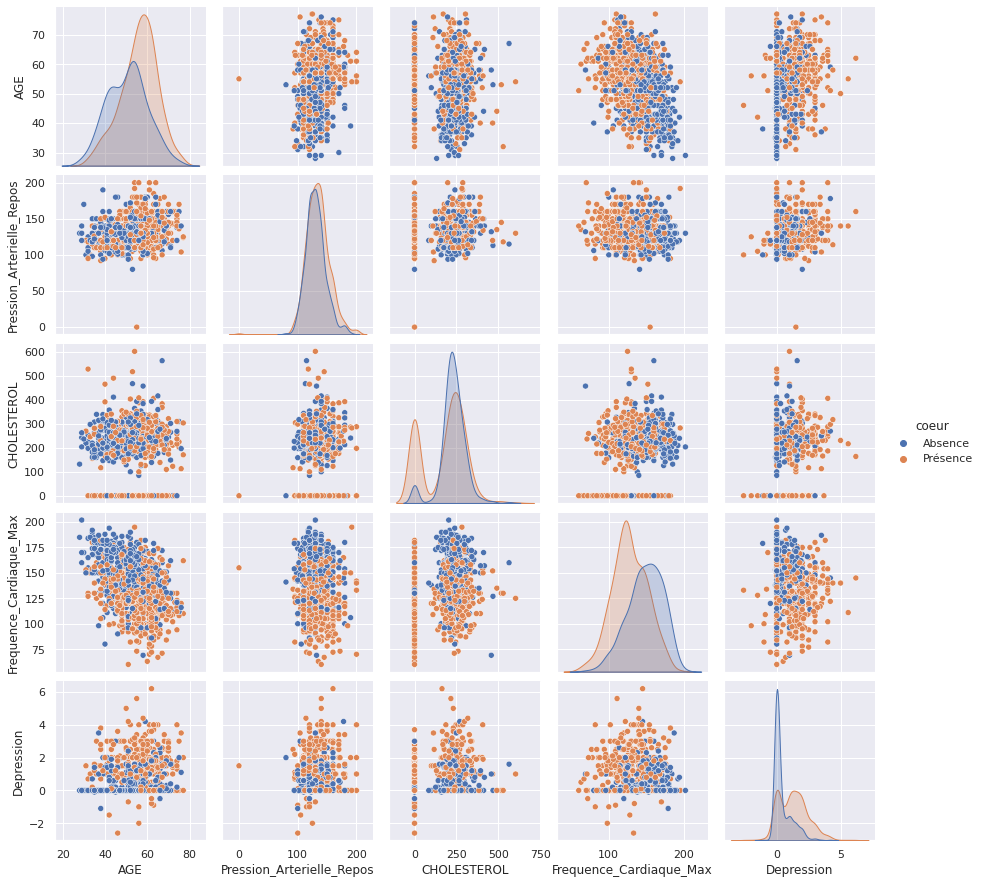

In [19]:
#Visualisation des relations entres les variable quantitative
sns.pairplot(data, hue='coeur');

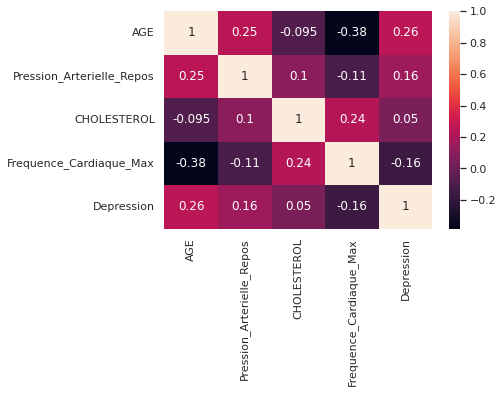

In [20]:
#Matrice de corrélation des variables quantitative
sns.heatmap(data[df_quanti].select_dtypes(exclude=object).corr(), annot=True);

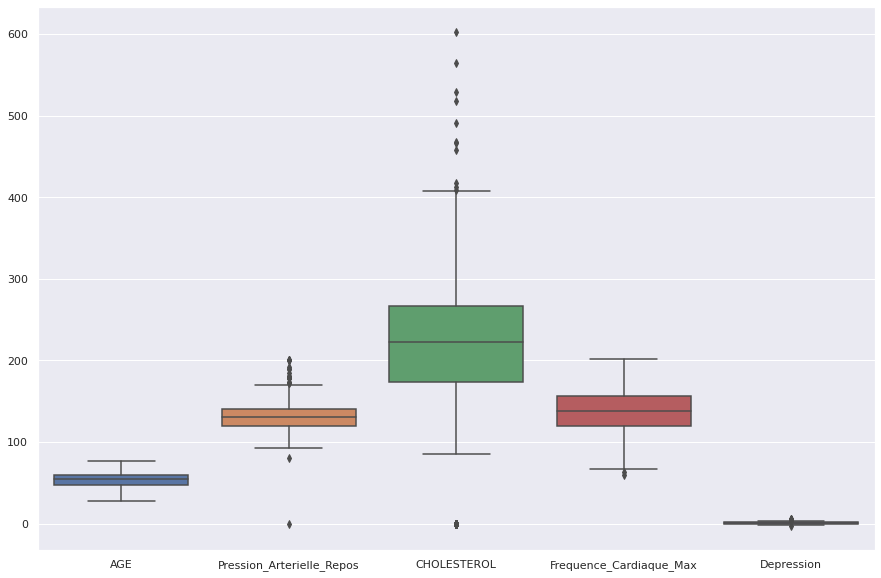

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[df_quanti]);

## Conclusion
* Taille du Dataset : Nous avons 918 indivudus et 12 variables. Le nombre de variable n'est pas adapté au nombre d'individu, il va falloir en choisir les plus pertinente lors de la construction du modèle de machine Learning.
* Type de Variable : Nous avons 7 variables qualitative et 5 variable quantitative.


- Variable Cible (Target) : 
    * Variable qualitative encode (0 : Absence de maladie, 1:Présence de maladie)
    * Plus de la moitié des individu du dataset ont la maladie (55%)
 
- Les Variables Qualitatives
  - Nous avons constatés que :
     * Il y a plus d'homme que de femme. **80%** (Sexe);
     * Au niveau de la variable Type Douleur Thoracique, le type de douleur dominant est celui de l'angine asymétrique soit 54%
     * La glycémie à jeûne la plus fréquente est celle qui est **inférieur à 120 mg/ml**. elle represente 77% de l'effectif total,
     * la plupart des individus ont un electrocardiogramme **normal** soit 60%,
     * La majorité des individus n'ont pas d'angine (60%)
     * La pente la plus repandue est **Plate**. elle fait 50%.

- Le variables Quantitatives
    - **AGE**
         * L'age de la population s'étend de 28 à 77 ans. Et la majorité des individus ont entre 50 et 65 ans, nous avons donc une population agée.
         * La moyenne d'age est de 54 ans.
         * Sa distribution semble suivre une loi normale
    - **Frequence Cardiaque Maximale**
         * Le rythme cardiaque le plus bas est de 60 battements/minute et le plus élevé est 202 battements/minutes;
         * la majorité des personnes ont un rythme cardiaque de 137 battements/minutes;
         * La distribution semble être normale (moyenne=medianne), 50% des individus ont une fréquence cardiaque de 137 battements/minutes
    - **pression arterielle repos**
         * La pression arterielle au repos le plus bas est de 0 unité de mesure et le plus élevé est 200 unité de mesure;
         * la majorité des personnes ont une pression arterielle au repos de 132,39;
         * La distribution semble être normale (moyenne=medianne), 50% des individus ont une fréquence cardiaque d'environ 132,39 battements/minutes
    - **La dépression et le cholesterol ne sont pas normalement distribués**
    
    - **Dépression*
        * Distribution étalée à gauche, 50% des individus ont une dépression inférieur à 0.9 (Moyenne > mediane)
    - **Cholesterol**
        * Distribution étalée à droite, 50% des individus ont une taux de cholesterol supérieur à 199 (Moyenne < mediane)




